<a href="https://colab.research.google.com/github/Anudeep0808/pythongit/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:** Create a classification model to predict price range of mobile
based on certain specifications

**Dataset entries**

Dataset as 21 features and 2000 entries. The meanings of the features are given below.
1. battery_power: Total energy a battery can store in one time measured in mAh
2. blue: Has bluetooth or not
3. clock_speed: speed at which microprocessor executes instructions
4. dual_sim: Has dual sim support or not
5. fc: Front Camera mega pixels
6. four_g: Has 4G or not
7. int_memory: Internal Memory in Gigabytes
8. m_dep: Mobile Depth in cm
9. mobile_wt: Weight of mobile phone
10. n_cores: Number of cores of processor

11. pc: Primary Camera mega pixels
12. px_height: Pixel Resolution Height
13. px_width: Pixel Resolution Width
14. ram: Random Access Memory in Mega Bytes
15. sc_h: Screen Height of mobile in cm
16. sc_w: Screen Width of mobile in cm
17. talk_time: longest time that a single battery charge will last when you are
18. three_g: Has 3G or not
19. touch_screen: Has touch screen or not
20. wifi: Has wifi or not
21. price_range: This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

Importing dataset

In [ ]:
dataset = pd.read_csv('mobile_price_range_data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

**Visualizing data for correlation**

In [ ]:
for i in dataset.columns:
  print(i,dataset[i].corr(dataset['price_range'],method = 'pearson'))
  ''' we see that ram has the highest correlation value i.e as ram value increases price also increases
   and -ve correlation between weight of phone and price i.e as weight increases price decreases etc.'''

battery_power 0.20072261211373094
blue 0.0205728540614185
clock_speed -0.006605690881732072
dual_sim 0.01744447923722472
fc 0.021998207776904255
four_g 0.014771711417239368
int_memory 0.04443495938898744
m_dep 0.0008530365050864314
mobile_wt -0.030302171314386412
n_cores 0.004399274799457278
pc 0.03359930021353949
px_height 0.14885755500042175
px_width 0.16581750172625515
ram 0.9170457362649905
sc_h 0.022986073167424428
sc_w 0.038711271664484175
talk_time 0.021858871162374796
three_g 0.023611216880045034
touch_screen -0.03041107189821805
wifi 0.018784812012788994
price_range 1.0


correlation matrix of our datset

In [ ]:
dataset.corr(method = 'pearson')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


**Looking for outliers**

In [ ]:
#This is an optional code which contain future warnings
'''plt.figure(figsize=(25,10))
pt = data
for index,item in enumerate([i for i in pt.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(pt[item])
print("\n")'''

Heatmap of the datset

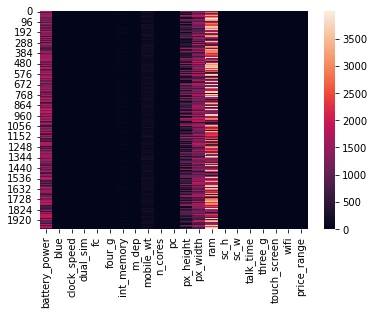

In [ ]:
sns.heatmap(dataset)
plt.show()

Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
imputer.fit(x[:,:])
x[:,:] = imputer.transform(x[:,:])

Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 7)

Confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

**1.RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

Training and prediction

In [ ]:
rfc.fit(X_train, Y_train)
y_pred_rfc=rfc.predict(X_test)

Function for accuracy metrices

Random Forest Classifier Accuracy Score:  0.895
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       109
           1       0.86      0.94      0.90        89
           2       0.84      0.83      0.83       106
           3       0.90      0.85      0.88        96

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400



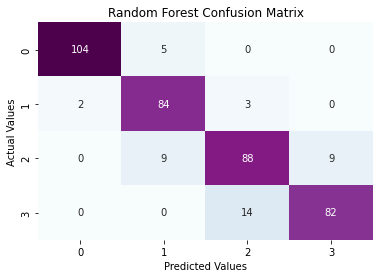

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(Y_test,y_pred_rfc))
cm_rfc=my_confusion_matrix(Y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

 **2.KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

Training and Prediction

In [ ]:
knn.fit(X_train, Y_train)
y_pred_knn=knn.predict(X_test)

Accuracy check

KNN Classifier Accuracy Score:  0.9325
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       109
           1       0.91      0.94      0.93        89
           2       0.90      0.91      0.90       106
           3       0.94      0.92      0.93        96

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



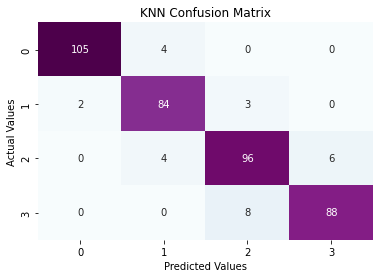

In [ ]:
print('KNN Classifier Accuracy Score: ',accuracy_score(Y_test,y_pred_knn))
cm_rfc=my_confusion_matrix(Y_test, y_pred_knn, 'KNN Confusion Matrix')

**3.SVM CLASSIFIER**

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

Training and Prediction

In [ ]:
svm_clf.fit(X_train, Y_train)
y_pred_svm=svm_clf.predict(X_test)

Accuracy check

SVM Classifier Accuracy Score:  0.955
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       109
           1       0.90      0.99      0.94        89
           2       0.97      0.90      0.93       106
           3       0.96      0.97      0.96        96

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



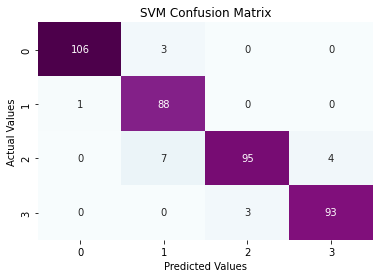

In [ ]:
print('SVM Classifier Accuracy Score: ',accuracy_score(Y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(Y_test, y_pred_svm, 'SVM Confusion Matrix')

**4.Logistic Regression**

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train[:,:] = SC.fit_transform(X_train[:,:])
X_test[:,:] = SC.transform(X_test[:,:])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


Training and Prediction

In [ ]:
lr.fit(X_train,Y_train)
y_pred_lr=lr.predict(X_test)

Accuracy check

Logistic Classifier Accuracy Score:  0.9625
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       109
           1       0.90      0.97      0.93        89
           2       0.97      0.93      0.95       106
           3       0.99      0.99      0.99        96

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



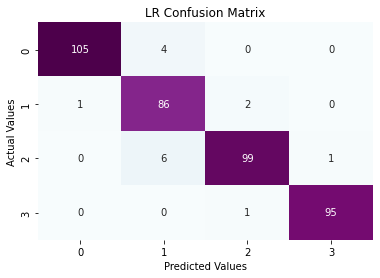

In [ ]:
print('Logistic Classifier Accuracy Score: ',accuracy_score(Y_test,y_pred_lr))
cm_rfc=my_confusion_matrix(Y_test, y_pred_lr, 'LR Confusion Matrix')


**5.Decision tree classifier using gini impurity (CART):**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import math
DT = DecisionTreeClassifier()

Training and prediction

In [ ]:
DT.fit(X_train,Y_train)
y_pred_DT = DT.predict(X_test)

Accuracy check

Decision tree Classifier Accuracy Score:  0.8425
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       109
           1       0.78      0.76      0.77        89
           2       0.78      0.82      0.80       106
           3       0.88      0.88      0.88        96

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



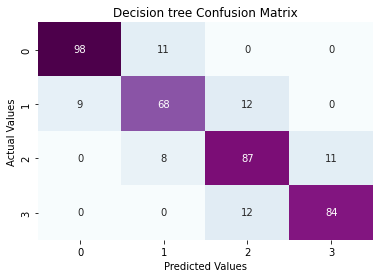

In [ ]:
print('Decision tree Classifier Accuracy Score: ',accuracy_score(Y_test,y_pred_DT))
cm_rfc=my_confusion_matrix(Y_test, y_pred_DT, 'Decision tree Confusion Matrix')

Tree diagram

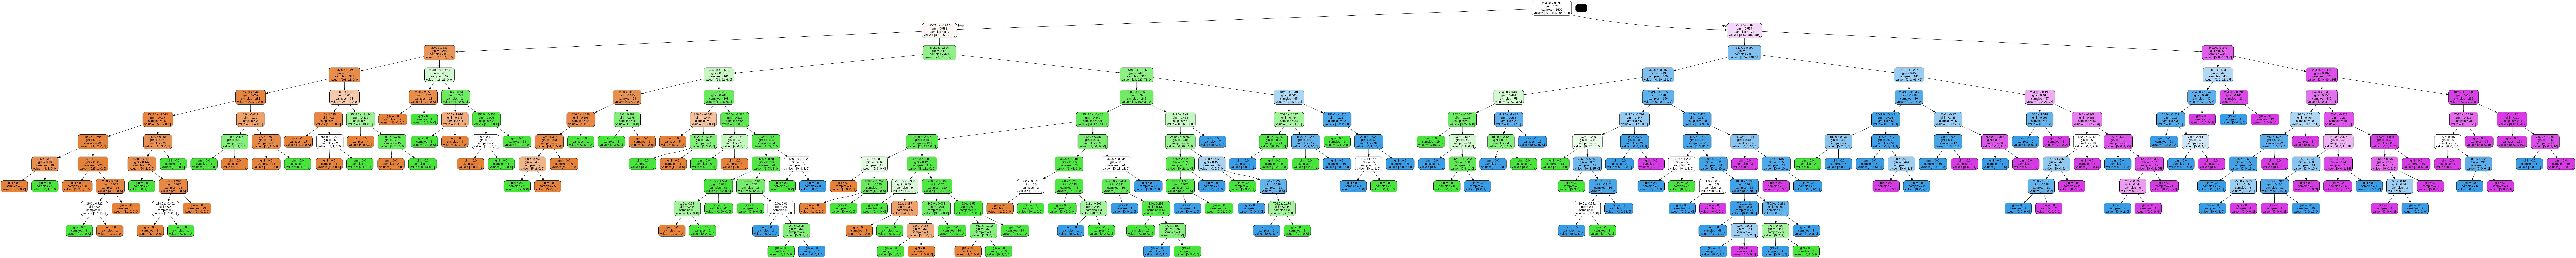

In [159]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT, out_file = dot_data,
                filled = True, rounded = True,
                feature_names = x[0,:],
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


**Conclusion:**
****
**From the above analysis logistic Regression Classifier gave the highest accuracy followed by SVM and KNN**
** **


*   Logistic Classifier Accuracy Score:  0.9625
*   SVM Classifier Accuracy Score:  0.955

*   KNN Classifier Accuracy Score:  0.9325
*   Random Forest Classifier Accuracy Score:  0.895

*   Decision tree Classifier Accuracy Score:  0.8425


*   Ram has continuous increase with price range while moving from Low    cost to Very high cost

*   costly phones are lighter
*   RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.













